# Import package

Name:Yingning Fan
USCID: 2551307534

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import math

# (a) Download the Vertebral Column Data Set

In [3]:
verte = pd.read_table('../data/vertebral_column_data/column_2C.dat', sep=' ', names = ['pelvic_incidence','pelvic_tilt',
                                                      'lumbar_lordosis_angle','sacral_slope',
                                                      'pelvic_radius','grade_spondylolisthesis',
                                                      'class_label','class'])
verte['class'][verte['class_label'] == 'AB'] = 1 #mark AB as class 1
verte['class'][verte['class_label'] == 'NO'] = 0 #mark NO as class 1
verte_new = verte.astype({'class': int})
verte_new

<ipython-input-3-a4dcf7d3f7c3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  verte['class'][verte['class_label'] == 'AB'] = 1 #mark AB as class 1
<ipython-input-3-a4dcf7d3f7c3>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  verte['class'][verte['class_label'] == 'NO'] = 0 #mark NO as class 1


,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,grade_spondylolisthesis,class_label,class
0,63.03,22.55,39.61,40.48,98.67,-0.25,AB,1
1,39.06,10.06,25.02,29.00,114.41,4.56,AB,1
2,68.83,22.22,50.09,46.61,105.99,-3.53,AB,1
3,69.30,24.65,44.31,44.64,101.87,11.21,AB,1
4,49.71,9.65,28.32,40.06,108.17,7.92,AB,1
...,...,...,...,...,...,...,...,...
305,47.90,13.62,36.00,34.29,117.45,-4.25,NO,0
306,53.94,20.72,29.22,33.22,114.37,-0.42,NO,0
307,61.45,22.69,46.17,38.75,125.67,-2.71,NO,0
308,45.25,8.69,41.58,36.56,118.55,0.21,NO,0


# (b) Pre-Processing and Exploratory data analysis:

 (i)Make scatterplots of the independent variables in the dataset. Use color to show Classes 0 and 1.

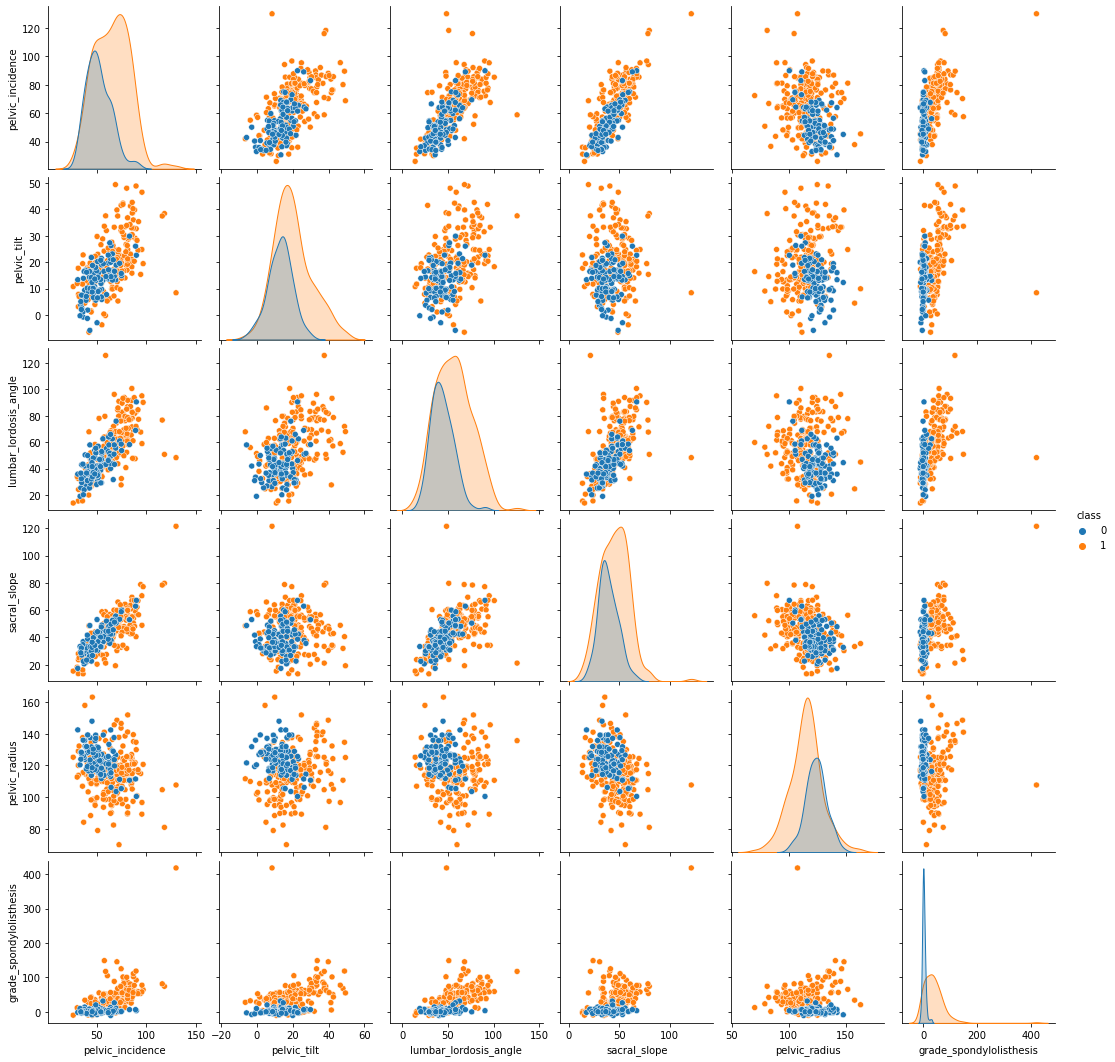

In [292]:
sns.pairplot(verte_new, hue='class')

ii. Make boxplots for each of the independent variables. Use color to show Classes 0 and 1 (see ISLR p. 129).

<AxesSubplot:xlabel='class_label', ylabel='pelvic_incidence'>

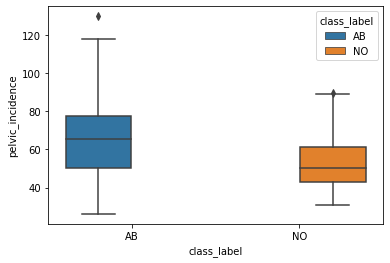

In [293]:
#pelvic_incidence
sns.boxplot(x='class_label',y='pelvic_incidence',hue="class_label",data=verte_new)

<AxesSubplot:xlabel='class_label', ylabel='pelvic_incidence'>

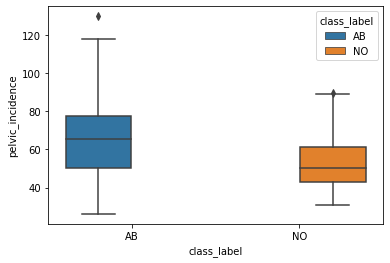

In [294]:
#pelvic_tilt
sns.boxplot(x='class_label',y='pelvic_incidence',hue="class_label",data=verte_new)

<AxesSubplot:xlabel='class_label', ylabel='lumbar_lordosis_angle'>

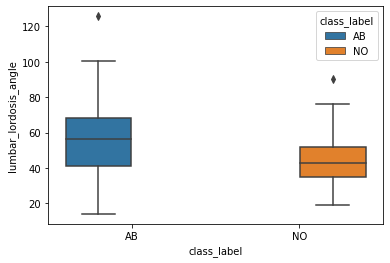

In [295]:
#lumbar_lordosis_angle
sns.boxplot(x='class_label',y='lumbar_lordosis_angle',hue="class_label",data=verte_new)

<AxesSubplot:xlabel='class_label', ylabel='sacral_slope'>

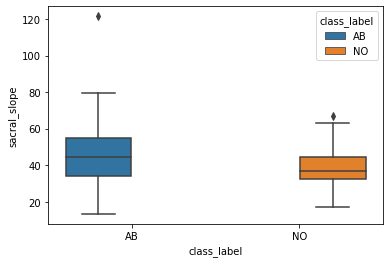

In [296]:
#sacral_slope
sns.boxplot(x='class_label',y='sacral_slope',hue="class_label",data=verte_new)

<AxesSubplot:xlabel='class_label', ylabel='pelvic_radius'>

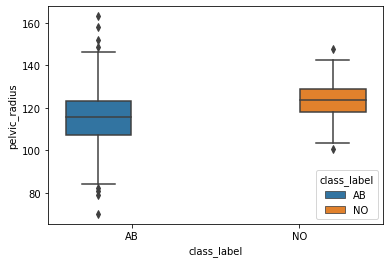

In [297]:
#pelvic_radius
sns.boxplot(x='class_label',y='pelvic_radius',hue="class_label",data=verte_new)

<AxesSubplot:xlabel='class_label', ylabel='grade_spondylolisthesis'>

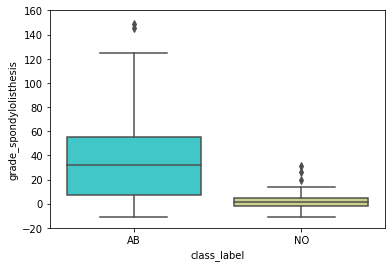

In [298]:
#grade_spondylolisthesis
plt.ylim([-20,160])
sns.boxplot(x="class_label", y="grade_spondylolisthesis",data=verte_new, palette="rainbow")

iii. Select the first 70 rows of Class 0 and the first 140 rows of Class 1 as the training
set and the rest of the data as the test set

In [4]:
abnor = verte_new[verte_new['class_label'] == 'AB'] #collect abnormal dataframe
nor = verte_new[verte_new['class_label'] == 'NO']   #collect normal dataframe
training = pd.concat([nor[0:70], abnor[0:140]]) #combine two dataframes into training dataframe
training.reset_index(inplace=True,drop=True) #reset dataframe's index
test = pd.concat([nor[70:], abnor[140:]]) #combine two dataframes into testing dataframe
test.reset_index(drop=True,inplace=True)#reset dataframe's index
training
test
x_train = training[['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle', 
                         'sacral_slope', 'pelvic_radius', 'grade_spondylolisthesis']]
y_train = training['class']
x_test = test[['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle', 
                         'sacral_slope', 'pelvic_radius', 'grade_spondylolisthesis']]
y_test = test['class']
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
x_test = np.array(x_test)
training

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,grade_spondylolisthesis,class_label,class
0,38.51,16.96,35.11,21.54,127.63,7.99,NO,0
1,54.92,18.97,51.60,35.95,125.85,2.00,NO,0
2,44.36,8.95,46.90,35.42,129.22,4.99,NO,0
3,48.32,17.45,48.00,30.87,128.98,-0.91,NO,0
4,45.70,10.66,42.58,35.04,130.18,-3.39,NO,0
...,...,...,...,...,...,...,...,...
205,77.12,30.35,77.48,46.77,110.61,82.09,AB,1
206,88.02,39.84,81.77,48.18,116.60,56.77,AB,1
207,83.40,34.31,78.42,49.09,110.47,49.67,AB,1
208,72.05,24.70,79.87,47.35,107.17,56.43,AB,1


# (c) Classification using KNN on Vertebral Column Data Set

c.i. Write code for k-nearest neighbors with Euclidean metric (or use a software package).

In [5]:
train_error_total = [] #train error over all for question (f)
knn = KNeighborsClassifier(n_neighbors=4) #knn model
knn.fit(x_train, y_train) #train model

KNeighborsClassifier(n_neighbors=4)

In [6]:
y_pred_train = knn.predict(x_train) #predict train value y
y_pred_test = knn.predict(x_test) #predict test value y
print('knn training score:', knn.score(x_train, y_train))
print('knn testing score:', knn.score(x_test, y_test))

knn training score: 0.8571428571428571
knn testing score: 0.94


c.ii. Test all the data in the test database with k nearest neighbors

k: 208.000000  test_error: 0.300000  train_error: 0.333333
k: 207.000000  test_error: 0.300000  train_error: 0.333333
k: 206.000000  test_error: 0.300000  train_error: 0.333333
k: 205.000000  test_error: 0.300000  train_error: 0.333333
k: 204.000000  test_error: 0.300000  train_error: 0.333333
k: 203.000000  test_error: 0.300000  train_error: 0.333333
k: 202.000000  test_error: 0.300000  train_error: 0.333333
k: 201.000000  test_error: 0.300000  train_error: 0.333333
k: 200.000000  test_error: 0.300000  train_error: 0.333333
k: 199.000000  test_error: 0.300000  train_error: 0.333333
k: 198.000000  test_error: 0.300000  train_error: 0.333333
k: 197.000000  test_error: 0.300000  train_error: 0.333333
k: 196.000000  test_error: 0.300000  train_error: 0.333333
k: 195.000000  test_error: 0.300000  train_error: 0.333333
k: 194.000000  test_error: 0.300000  train_error: 0.333333
k: 193.000000  test_error: 0.300000  train_error: 0.333333
k: 192.000000  test_error: 0.300000  train_error: 0.3333

k: 63.000000  test_error: 0.120000  train_error: 0.166667
k: 62.000000  test_error: 0.110000  train_error: 0.152381
k: 61.000000  test_error: 0.120000  train_error: 0.161905
k: 60.000000  test_error: 0.120000  train_error: 0.166667
k: 59.000000  test_error: 0.130000  train_error: 0.185714
k: 58.000000  test_error: 0.120000  train_error: 0.166667
k: 57.000000  test_error: 0.120000  train_error: 0.176190
k: 56.000000  test_error: 0.120000  train_error: 0.171429
k: 55.000000  test_error: 0.120000  train_error: 0.171429
k: 54.000000  test_error: 0.110000  train_error: 0.176190
k: 53.000000  test_error: 0.110000  train_error: 0.171429
k: 52.000000  test_error: 0.110000  train_error: 0.161905
k: 51.000000  test_error: 0.110000  train_error: 0.157143
k: 50.000000  test_error: 0.110000  train_error: 0.157143
k: 49.000000  test_error: 0.110000  train_error: 0.161905
k: 48.000000  test_error: 0.110000  train_error: 0.161905
k: 47.000000  test_error: 0.110000  train_error: 0.152381
k: 46.000000  

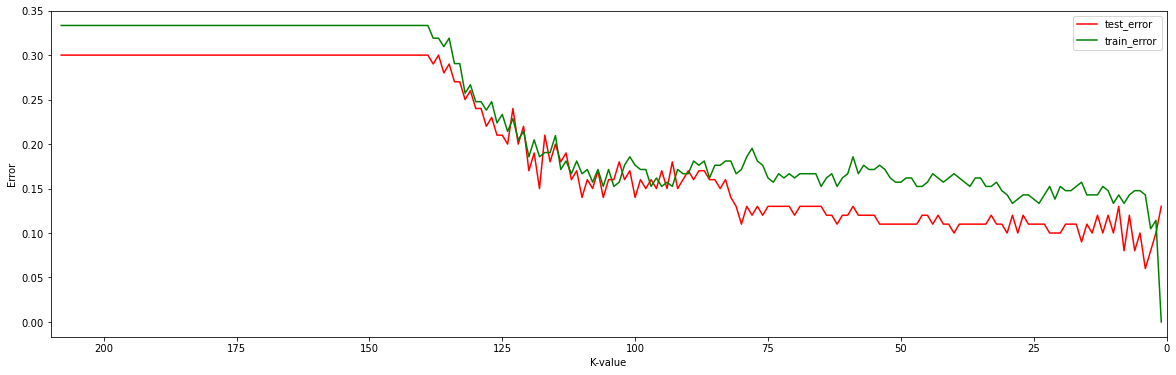

In [7]:
k = np.arange(208,0,-1) # find the most suitable k value
#print(k)
test_error = []
train_error = []
for a in k:
    knn = KNeighborsClassifier(n_neighbors=a)
    knn.fit(x_train, y_train)
    #y_pred_train = knn.predict(x_train)
    #y_pred_test = knn.predict(x_test)
    train_score = 1 - knn.score(x_train, y_train)
    test_score = 1 - knn.score(x_test, y_test)
    test_error.append(test_score)
    train_error.append(train_score)
    print('k: %f' %a + '  test_error: %f' %test_score + '  train_error: %f' %train_score)
plt.figure(figsize=(20,6))
plt.plot(k, test_error, color = 'r',label = 'test_error')
plt.plot(k, train_error, color = 'g',label = 'train_error')
plt.legend()
plt.xlabel("K-value")
plt.ylabel("Error")
plt.xlim(210,0)
k[test_error.index(min(test_error))]
train_error_total.append(min(train_error))

In [8]:
bestvalue_k = k[test_error.index(min(test_error))] #the most suitable k among those values using index to locate
print('best value of k: ', bestvalue_k)

best value of k:  4


In [9]:
#Calculate the confusion matrix, true positive rate, true negative rate, precision and F1-score
# using test group
knn = KNeighborsClassifier(n_neighbors=bestvalue_k)
knn.fit(x_train, y_train)
y_pred_test = knn.predict(x_test)
confusion = confusion_matrix(y_test, y_pred_test)
print(confusion)

true_negative = confusion[0][0]
false_positive = confusion[0][1]
false_negative = confusion[1][0]
true_positive = confusion[1][1]
tp_rate = true_positive / (false_negative + true_positive) #recall
tn_rate = true_negative / (true_negative + false_positive)
precision = true_positive / (false_positive + true_positive)
f1 = 2 / ((1/precision)+(1/tp_rate))
print('true positive rate:',tp_rate)
print('true negative rate:',tn_rate)
print('precision:',precision)
print('f1_score:',f1)

[[25  5]
 [ 1 69]]
true positive rate: 0.9857142857142858
true negative rate: 0.8333333333333334
precision: 0.9324324324324325
f1_score: 0.9583333333333336


c.iii Plot the best test error rate

[0.24, 0.18999999999999995, 0.21999999999999997, 0.25, 0.30000000000000004, 0.29000000000000004, 0.29000000000000004, 0.29000000000000004, 0.29000000000000004, 0.28, 0.21999999999999997, 0.17000000000000004, 0.16000000000000003, 0.15000000000000002, 0.13, 0.13, 0.13, 0.09999999999999998, 0.08999999999999997, 0.08999999999999997, 0.07999999999999996]


Text(0, 0.5, 'Test Errors')

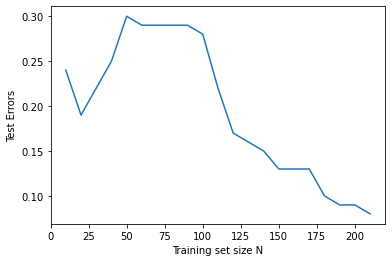

In [10]:
minimum = []
for n in range(10, 211, 10):
    test_error_new = []
    train_new = pd.concat([training[0:int(n/3)], training[70:70+int(2*n/3)]]) #combine two dataframes from training
    train_new.reset_index(inplace=True,drop=True) #reset dataframe's index
    #print(train_new)
    x_train_new = np.array(train_new[['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle', 
                         'sacral_slope', 'pelvic_radius', 'grade_spondylolisthesis']])
    y_train_new = np.array(train_new['class'])
    kvalue = []
    for i in range(1, n, 5):
        kvalue.append(i)
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(x_train_new, y_train_new)
        y_pred_test_new = knn.predict(x_test)
        test_score_new = 1 - knn.score(x_test,y_test)
        test_error_new.append(test_score_new)
    mini = min(test_error_new)
    minimum.append(mini)
print(minimum)
    #bestvalue_k_new = kvalue[test_error_new.index(min(test_error_new))]
plt.plot(range(10, 211, 10), minimum)
plt.xlabel("Training set size N")
plt.ylabel("Test Errors")

# (d)Replace the Euclidean metric with the following metrics

i. Minkowski Distance:(a)manhattan distance

In [11]:
test_error = []
train_error = []
k = np.arange(1,200,5)
print(k)
for a in k:
    knn = KNeighborsClassifier(n_neighbors=a, p=1) #p=1 manhattan distance
    knn.fit(x_train, y_train)
    #y_pred_train = knn.predict(x_train)
    #y_pred_test = knn.predict(x_test)
    train_score = 1 - knn.score(x_train, y_train)
    test_score = 1 - knn.score(x_test, y_test)
    test_error.append(test_score)
    train_error.append(train_score)
    print('k: %f' %a + '  test_error: %f' %test_score + '  train_error: %f' %train_score)
for a in range(0,len(test_error),1):
    if test_error[a] == min(test_error):
        bestvalue_ka = k[a]   #the most suitable k among those values
        print('best k value: ', bestvalue_ka)
train_error_total.append(min(train_error))


[  1   6  11  16  21  26  31  36  41  46  51  56  61  66  71  76  81  86
  91  96 101 106 111 116 121 126 131 136 141 146 151 156 161 166 171 176
 181 186 191 196]
k: 1.000000  test_error: 0.120000  train_error: 0.000000
k: 6.000000  test_error: 0.110000  train_error: 0.138095
k: 11.000000  test_error: 0.110000  train_error: 0.142857
k: 16.000000  test_error: 0.120000  train_error: 0.133333
k: 21.000000  test_error: 0.120000  train_error: 0.147619
k: 26.000000  test_error: 0.110000  train_error: 0.166667
k: 31.000000  test_error: 0.120000  train_error: 0.166667
k: 36.000000  test_error: 0.130000  train_error: 0.161905
k: 41.000000  test_error: 0.130000  train_error: 0.166667
k: 46.000000  test_error: 0.130000  train_error: 0.171429
k: 51.000000  test_error: 0.140000  train_error: 0.171429
k: 56.000000  test_error: 0.130000  train_error: 0.185714
k: 61.000000  test_error: 0.150000  train_error: 0.176190
k: 66.000000  test_error: 0.150000  train_error: 0.180952
k: 71.000000  test_error: 

i. Minkowski Distance:(b)log10(p)

In [13]:
pvalue = []
test_error = []
train_error = []
for a in range(1,11,1):
    var = 10**(a/10)
    pvalue.append(var)
print(pvalue)
for i in pvalue:
    knn = KNeighborsClassifier(n_neighbors=bestvalue_ka, p=i)
    knn.fit(x_train, y_train)
    #y_pred_train = knn.predict(x_train)
    #y_pred_test = knn.predict(x_test)
    train_score = 1 - knn.score(x_train, y_train)
    test_score = 1 - knn.score(x_test, y_test)
    test_error.append(test_score)
    train_error.append(train_score)
    print('k: %f' %i + '  test_error: %f' %test_score + '  train_error: %f' %train_score)
#test_error_all = []
#test_error_all.append(min(test_error))
#print(test_error_all)
train_error_total.append(min(train_error))
for a in range(0,len(test_error),1):
    if test_error[a] == min(test_error):
        bestvalue_p = pvalue[a]   #the most suitable p among those values
        bestlog_p = math.log10(bestvalue_p)
        print('best value of logp:', bestlog_p) #the most suitable p among those values

[1.2589254117941673, 1.5848931924611136, 1.9952623149688795, 2.51188643150958, 3.1622776601683795, 3.9810717055349722, 5.011872336272722, 6.309573444801933, 7.943282347242816, 10.0]
k: 1.258925  test_error: 0.100000  train_error: 0.161905
k: 1.584893  test_error: 0.100000  train_error: 0.147619
k: 1.995262  test_error: 0.110000  train_error: 0.142857
k: 2.511886  test_error: 0.100000  train_error: 0.138095
k: 3.162278  test_error: 0.110000  train_error: 0.138095
k: 3.981072  test_error: 0.100000  train_error: 0.138095
k: 5.011872  test_error: 0.110000  train_error: 0.142857
k: 6.309573  test_error: 0.110000  train_error: 0.147619
k: 7.943282  test_error: 0.110000  train_error: 0.147619
k: 10.000000  test_error: 0.110000  train_error: 0.152381
best value of logp: 0.10000000000000002
best value of logp: 0.20000000000000004
best value of logp: 0.4
best value of logp: 0.6


i. Minkowski Distance: (c) which becomes Chebyshev Distance with p → ∞

In [16]:
k = np.arange(1,200,5)
test_error = []
train_error = []
for a in k:
    knn = KNeighborsClassifier(n_neighbors=a, p = math.inf)
    knn.fit(x_train, y_train)
    #y_pred_train = knn.predict(x_train)
    #y_pred_test = knn.predict(x_test)
    train_score = 1 - knn.score(x_train, y_train)
    test_score = 1 - knn.score(x_test, y_test)
    test_error.append(test_score)
    train_error.append(train_score)
    print('k: %f' %a + '  test_error: %f' %test_score + '  train_error: %f' %train_score)
for a in range(0,len(test_error),1):
    if test_error[a] == min(test_error):
        bestvalue_kc = k[a]   #the most suitable k among those values
        print('best k value of chebyshev: ', bestvalue_kc)
train_error_total.append(min(train_error))

k: 1.000000  test_error: 0.130000  train_error: 0.000000
k: 6.000000  test_error: 0.100000  train_error: 0.152381
k: 11.000000  test_error: 0.120000  train_error: 0.152381
k: 16.000000  test_error: 0.080000  train_error: 0.147619
k: 21.000000  test_error: 0.110000  train_error: 0.133333
k: 26.000000  test_error: 0.120000  train_error: 0.157143
k: 31.000000  test_error: 0.120000  train_error: 0.142857
k: 36.000000  test_error: 0.100000  train_error: 0.152381
k: 41.000000  test_error: 0.130000  train_error: 0.142857
k: 46.000000  test_error: 0.120000  train_error: 0.161905
k: 51.000000  test_error: 0.120000  train_error: 0.166667
k: 56.000000  test_error: 0.120000  train_error: 0.166667
k: 61.000000  test_error: 0.140000  train_error: 0.171429
k: 66.000000  test_error: 0.130000  train_error: 0.161905
k: 71.000000  test_error: 0.140000  train_error: 0.180952
k: 76.000000  test_error: 0.110000  train_error: 0.176190
k: 81.000000  test_error: 0.140000  train_error: 0.171429
k: 86.000000  te

ii. Mahalanobis Distance

In [17]:
k = np.arange(1,200,5)
inv_cov_x = np.linalg.inv(np.cov(x_train,rowvar=False))
test_error = []
train_error = []
for a in k:
    knn = KNeighborsClassifier(n_neighbors=a,metric='mahalanobis',
                               metric_params={'VI':inv_cov_x})
    knn.fit(x_train, y_train)
    #y_pred_train = knn.predict(x_train)
    #y_pred_test = knn.predict(x_test)
    train_score = 1 - knn.score(x_train, y_train)
    test_score = 1 - knn.score(x_test, y_test)
    test_error.append(test_score)
    train_error.append(train_score)
    print('k: %f' %a + '  test_error: %f' %test_score + '  train_error: %f' %train_score)
for a in range(0,len(test_error),1):
    if test_error[a] == min(test_error):
        bestvalue_kd2 = k[a]   #the most suitable k among those values
        print('best k value of Mahalanobis: ',bestvalue_kd2)
train_error_total.append(min(train_error))

k: 1.000000  test_error: 0.170000  train_error: 0.000000
k: 6.000000  test_error: 0.170000  train_error: 0.119048
k: 11.000000  test_error: 0.200000  train_error: 0.185714
k: 16.000000  test_error: 0.200000  train_error: 0.176190
k: 21.000000  test_error: 0.210000  train_error: 0.176190
k: 26.000000  test_error: 0.200000  train_error: 0.185714
k: 31.000000  test_error: 0.230000  train_error: 0.180952
k: 36.000000  test_error: 0.210000  train_error: 0.180952
k: 41.000000  test_error: 0.240000  train_error: 0.185714
k: 46.000000  test_error: 0.240000  train_error: 0.185714
k: 51.000000  test_error: 0.240000  train_error: 0.190476
k: 56.000000  test_error: 0.260000  train_error: 0.190476
k: 61.000000  test_error: 0.250000  train_error: 0.204762
k: 66.000000  test_error: 0.270000  train_error: 0.195238
k: 71.000000  test_error: 0.260000  train_error: 0.219048
k: 76.000000  test_error: 0.250000  train_error: 0.214286
k: 81.000000  test_error: 0.240000  train_error: 0.238095
k: 86.000000  te

# (e)Use weighted voting with Euclidean, Manhattan, 
and Chebyshev distances and report the best 
test errors when k ∈ {1,6,11,16,...,196}.

In [19]:
#euclidean
k = np.arange(1,200,5)
test_error = []
train_error = []
for a in k:
    knn = KNeighborsClassifier(n_neighbors=a, weights = 'distance')
    knn.fit(x_train, y_train)
    #y_pred_train = knn.predict(x_train)
    #y_pred_test = knn.predict(x_test)
    train_score = 1 - knn.score(x_train, y_train)
    test_score = 1 - knn.score(x_test, y_test)
    test_error.append(test_score)
    train_error.append(train_score)
    print('k: %f' %a + '  test_error: %f' %test_score + '  train_error: %f' %train_score)
min_euc = min(test_error)
print(min_euc)
bestvalue_k_e1 = k[test_error.index(min(test_error))]
train_error_total.append(min(train_error))
print('best k value is:', bestvalue_k_e1)

k: 1.000000  test_error: 0.130000  train_error: 0.000000
k: 6.000000  test_error: 0.100000  train_error: 0.000000
k: 11.000000  test_error: 0.120000  train_error: 0.000000
k: 16.000000  test_error: 0.110000  train_error: 0.000000
k: 21.000000  test_error: 0.110000  train_error: 0.000000
k: 26.000000  test_error: 0.110000  train_error: 0.000000
k: 31.000000  test_error: 0.110000  train_error: 0.000000
k: 36.000000  test_error: 0.110000  train_error: 0.000000
k: 41.000000  test_error: 0.110000  train_error: 0.000000
k: 46.000000  test_error: 0.110000  train_error: 0.000000
k: 51.000000  test_error: 0.110000  train_error: 0.000000
k: 56.000000  test_error: 0.110000  train_error: 0.000000
k: 61.000000  test_error: 0.110000  train_error: 0.000000
k: 66.000000  test_error: 0.110000  train_error: 0.000000
k: 71.000000  test_error: 0.110000  train_error: 0.000000
k: 76.000000  test_error: 0.120000  train_error: 0.000000
k: 81.000000  test_error: 0.130000  train_error: 0.000000
k: 86.000000  te

In [20]:
#Manhatten distance
k = np.arange(1,200,5)
test_error = []
train_error = []
for a in k:
    knn = KNeighborsClassifier(n_neighbors=a, weights = 'distance',p=1)
    knn.fit(x_train, y_train)
    #y_pred_train = knn.predict(x_train)
    #y_pred_test = knn.predict(x_test)
    train_score = 1 - knn.score(x_train, y_train)
    test_score = 1 - knn.score(x_test, y_test)
    test_error.append(test_score)
    train_error.append(train_score)
    print('k: %f' %a + '  test_error: %f' %test_score + '  train_error: %f' %train_score)
min_man = min(test_error)
print(min_man)
bestvalue_k_e2 = k[test_error.index(min(test_error))]
print('best k value is:', bestvalue_k_e2)
train_error_total.append(min(train_error))

k: 1.000000  test_error: 0.120000  train_error: 0.000000
k: 6.000000  test_error: 0.110000  train_error: 0.000000
k: 11.000000  test_error: 0.110000  train_error: 0.000000
k: 16.000000  test_error: 0.120000  train_error: 0.000000
k: 21.000000  test_error: 0.110000  train_error: 0.000000
k: 26.000000  test_error: 0.100000  train_error: 0.000000
k: 31.000000  test_error: 0.110000  train_error: 0.000000
k: 36.000000  test_error: 0.110000  train_error: 0.000000
k: 41.000000  test_error: 0.110000  train_error: 0.000000
k: 46.000000  test_error: 0.110000  train_error: 0.000000
k: 51.000000  test_error: 0.120000  train_error: 0.000000
k: 56.000000  test_error: 0.120000  train_error: 0.000000
k: 61.000000  test_error: 0.130000  train_error: 0.000000
k: 66.000000  test_error: 0.130000  train_error: 0.000000
k: 71.000000  test_error: 0.110000  train_error: 0.000000
k: 76.000000  test_error: 0.120000  train_error: 0.000000
k: 81.000000  test_error: 0.140000  train_error: 0.000000
k: 86.000000  te

In [21]:
#Chebyshev
k = np.arange(1,200,5)
test_error = []
train_error = []
for a in k:
    knn = KNeighborsClassifier(n_neighbors=a, weights = 'distance',p=math.inf)
    knn.fit(x_train, y_train)
    #y_pred_train = knn.predict(x_train)
    #y_pred_test = knn.predict(x_test)
    train_score = 1 - knn.score(x_train, y_train)
    test_score = 1 - knn.score(x_test, y_test)
    test_error.append(test_score)
    train_error.append(train_score)
    print('k: %f' %a + '  test_error: %f' %test_score + '  train_error: %f' %train_score)
min_cheb = min(test_error)
print(min_cheb)
bestvalue_k_e3 = k[test_error.index(min(test_error))]
print('best k value is:', bestvalue_k_e3)
train_error_total.append(min(train_error))

k: 1.000000  test_error: 0.130000  train_error: 0.000000
k: 6.000000  test_error: 0.130000  train_error: 0.000000
k: 11.000000  test_error: 0.120000  train_error: 0.000000
k: 16.000000  test_error: 0.110000  train_error: 0.000000
k: 21.000000  test_error: 0.120000  train_error: 0.000000
k: 26.000000  test_error: 0.120000  train_error: 0.000000
k: 31.000000  test_error: 0.110000  train_error: 0.000000
k: 36.000000  test_error: 0.110000  train_error: 0.000000
k: 41.000000  test_error: 0.110000  train_error: 0.000000
k: 46.000000  test_error: 0.120000  train_error: 0.000000
k: 51.000000  test_error: 0.120000  train_error: 0.000000
k: 56.000000  test_error: 0.120000  train_error: 0.000000
k: 61.000000  test_error: 0.110000  train_error: 0.000000
k: 66.000000  test_error: 0.130000  train_error: 0.000000
k: 71.000000  test_error: 0.120000  train_error: 0.000000
k: 76.000000  test_error: 0.120000  train_error: 0.000000
k: 81.000000  test_error: 0.120000  train_error: 0.000000
k: 86.000000  te

# (f)What is the lowest training error rate you achieved in this homework

In [313]:
minim = min(train_error_total)
print(minim)

0.0
